## Support Vector Machines (SVM) in Machine Learning

- Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this article, I will develop the intuition behind support vector machines and their use in classification problems.


- I will begin with the standard imports:

In [2]:
# Starting with the libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Use seaborn plotting defaults:
import seaborn as sns; sns.set()

### Motivating Support Vector Machines:

- Let’s consider the simple case of a classification task, in which the two classes of points are well separated:

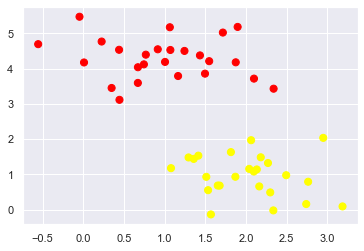

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

plt.scatter(X[: ,0], X[: ,1], c = y, s = 50, cmap = 'autumn')

- A linear discriminative classifier would attempt to draw a straight line separating the two sets of data and thereby create a model for classification.

- For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can correctly discriminate between the two classes.

- I will draw them as follows:

(-1.0, 3.5)

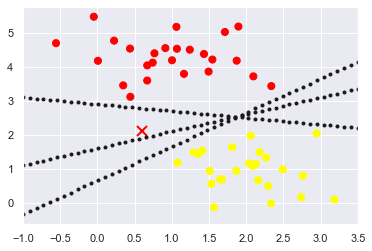

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '.k')
plt.xlim(-1, 3.5)

- These are three very different separators, which, nevertheless, correctly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the “X” in this plot) will be assigned a different label! Our simple intuition of “drawing a line between classes” is not enough, and we need to think a bit deeper.

### Support Vector Machines: Maximizing the Margin: 

- Support vector machines offer one way to improve on this. The intuition is this: rather than merely drawing a zero-width line between the classes, we can bring around each edge a margin of some width, up to the nearest point. Here is an example of how this might look:

1 0.65 0.33
[-0.35       -0.25816327 -0.16632653 -0.0744898   0.01734694  0.10918367
  0.20102041  0.29285714  0.38469388  0.47653061  0.56836735  0.66020408
  0.75204082  0.84387755  0.93571429  1.02755102  1.11938776  1.21122449
  1.30306122  1.39489796  1.48673469  1.57857143  1.67040816  1.7622449
  1.85408163  1.94591837  2.0377551   2.12959184  2.22142857  2.31326531
  2.40510204  2.49693878  2.58877551  2.68061224  2.77244898  2.86428571
  2.95612245  3.04795918  3.13979592  3.23163265  3.32346939  3.41530612
  3.50714286  3.59897959  3.69081633  3.78265306  3.8744898   3.96632653
  4.05816327  4.15      ]
0.5 1.6 0.55
[1.1        1.14591837 1.19183673 1.2377551  1.28367347 1.32959184
 1.3755102  1.42142857 1.46734694 1.51326531 1.55918367 1.60510204
 1.65102041 1.69693878 1.74285714 1.78877551 1.83469388 1.88061224
 1.92653061 1.97244898 2.01836735 2.06428571 2.11020408 2.15612245
 2.20204082 2.24795918 2.29387755 2.33979592 2.38571429 2.43163265
 2.47755102 2.52346939 2.569387

(-1.0, 3.5)

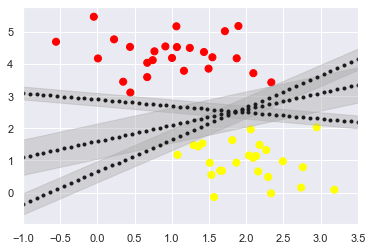

In [45]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[: ,0], X[: ,1], c = y, s = 50, cmap = 'autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    print(m, b, d)
    yfit = m * xfit + b
    print(yfit)
    plt.plot(xfit, yfit, '.k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

- In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

### Fitting a Support Vector Machine:

- Let’s see the result of an exact fit for this data: we will use Scikit-Learn’s support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number:

In [46]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

- To better visualize what’s happening here, let’s create a quick convenience function that will plot SVM decision boundaries for us:

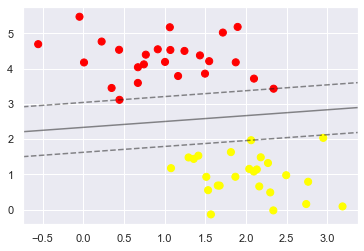

In [60]:
# Building a function to plot the result from our model:

def plot_svc_decision_function(model, ax = None, plot_support = True):
    
    """ Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model:
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins:
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    # Plot support vectors:
    if plot_support:
        ax.scatter(model.support_vectors_[: ,0],
                   model.support_vectors_[: ,1],
                   s = 300, linewidth = 1, facecolors = 'none')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
plt.scatter(X[: ,0], X[: ,1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

- This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: the black circles in this figure indicate them.

- These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ the attribute of the classifier:

In [62]:
# Printing the dots that are crossed by the margine lines:

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- A key to this classifier’s success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the right side do not modify the fit!

- Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

- We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

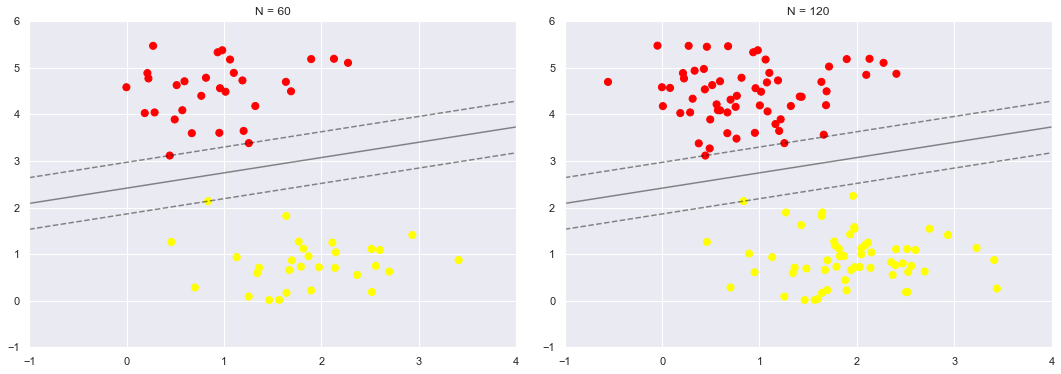

In [102]:
# Building a function that helps us to understand SVC better especially how the mirgin works:

def plot_svc(N = 10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.60)
    X = X[: N]
    y = y[: N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[: ,0], X[: ,1], c = y, s = 50, cmap = 'autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svc(N, axi)
    axi.set_title('N = {0}'.format(N))

### Example: Face Recognition:

- As an example of support vector machines in action, let’s take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [103]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


- Let’s plot a few of these faces to see what we’re working with:

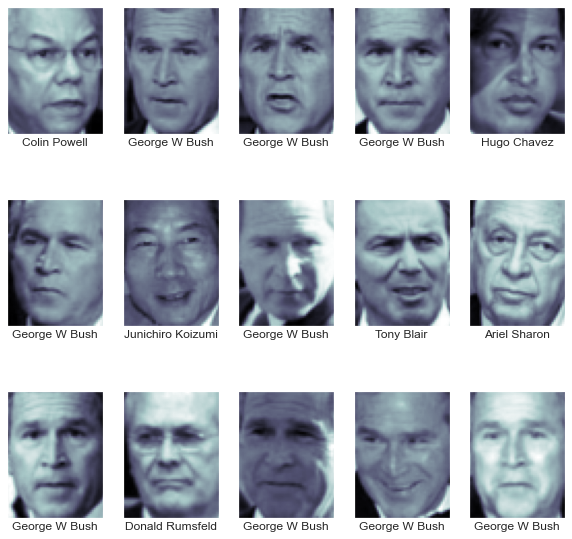

In [113]:
fig, ax = plt.subplots(3, 5, figsize = (10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

- Each image contains [62×47] or nearly 3,000 pixels. We could proceed by merely using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here, we will use a principal component analysis to remove 150 fundamental components to feed into our support vector machine classifier.

- We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [120]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

- For the sake of testing our classifier output, we will split the data into a training and testing set:

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state = 42)

- Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 50.2 s
{'svc__C': 10, 'svc__gamma': 0.001}


- The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

- Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [128]:
model = grid.best_estimator_

yfit = model.predict(X_test)

- Let’s take a look at a few of the test images along with their predicted values:

Text(0.5, 0.98, 'Predicted Names, Incorrect Labels in Red')

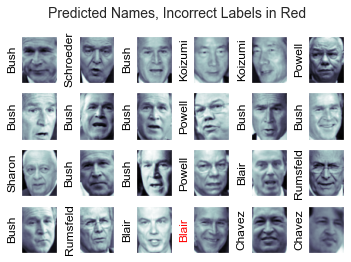

In [138]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color = 'black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names, Incorrect Labels in Red', size = 14)

- Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair).

- We can get a better sense of our estimator’s performance using the classification report, which lists recovery statistics label by label:

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



- We might also display the confusion matrix between these classes:

Text(89.18, 0.5, 'predicted label')

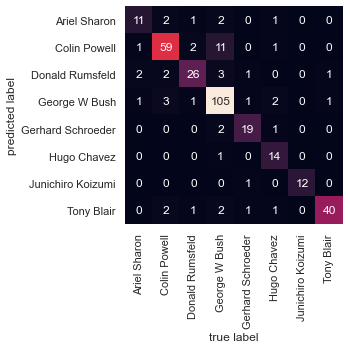

In [149]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

- With those traits in mind, I generally only turn to Support Vector Machines once another simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.